## CS 498 AML HW 3<br>
Kenneth Zhang (kfzhang2)<br>
Kirsten Wong <br>
Roshan Rajan <br>

4.10. CIFAR-10 is a dataset of 32x32 images in 10 categories, collected by Alex
Krizhevsky, Vinod Nair, and Geoffrey Hinton. It is often used to evaluate
machine learning algorithms. You can download this dataset from https://www.cs.toronto.edu/∼kriz/cifar.html.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
# Method for loading image data into dictionary.
def unpickle(file):
    import cPickle
    fo = open(file, 'rb')
    dict = cPickle.load(fo)
    fo.close()
    return dict

In [3]:
# Loads data from cifar folder into dictionary. (Make sure folder is in same directory as this notebook.)
import os
dirname = os.getcwd()

# Load entire batch; each has 10,000 images and labels. Maybe combine them into one matrix?
db1 = unpickle(dirname+'/cifar-10-batches-py/data_batch_1')
db2 = unpickle(dirname+'/cifar-10-batches-py/data_batch_2')
db3 = unpickle(dirname+'/cifar-10-batches-py/data_batch_3')
db4 = unpickle(dirname+'/cifar-10-batches-py/data_batch_4')
db5 = unpickle(dirname+'/cifar-10-batches-py/data_batch_5')

# Load test batch
testb = unpickle(dirname+'/cifar-10-batches-py/test_batch')

In [4]:
# Combine examples and labels into their own matrices

all_data = np.concatenate((db1['data'],db2['data']),0)
all_data = np.concatenate((all_data,db3['data']),0)
all_data = np.concatenate((all_data,db4['data']),0)
all_data = np.concatenate((all_data,db5['data']),0)

all_lbls = np.concatenate((db1['labels'],db2['labels']),0)
all_lbls = np.concatenate((all_lbls,db3['labels']),0)
all_lbls = np.concatenate((all_lbls,db4['labels']),0)
all_lbls = np.concatenate((all_lbls,db5['labels']),0)


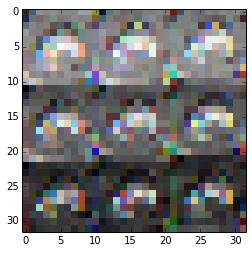

In [5]:
from PIL import Image
im = np.reshape(all_data[0],(32,32,3))
plt.imshow(im, interpolation='nearest')
plt.show()

In [7]:
# Dataset size
d_size = 50000

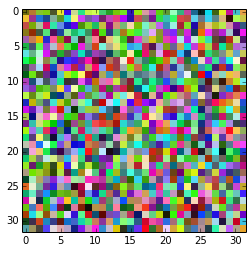

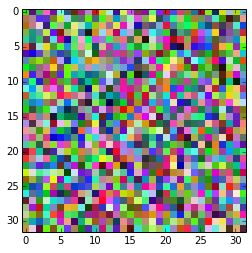

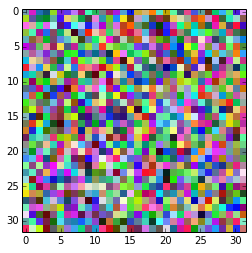

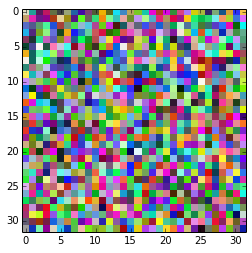

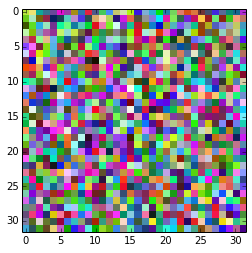

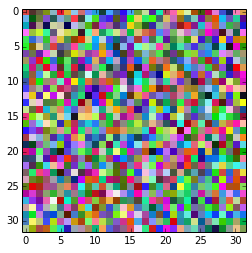

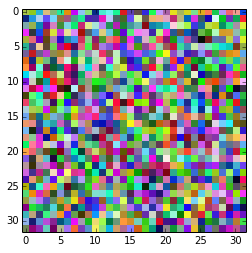

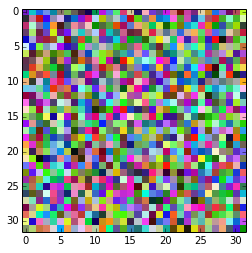

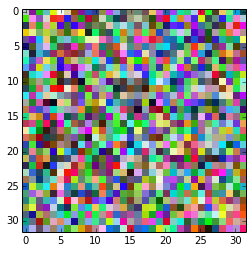

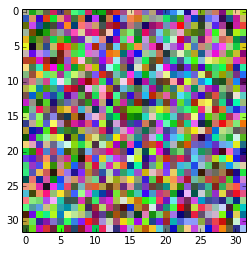

In [8]:
# ==============
# Problem 4.10 a
# ==============

# (a) For each category, compute the mean image and the first 20 principal
# components. Plot the error resulting from representing the images of each
# category using the first 20 principal components against the category.

# Loop through batches to find mean image

mean_imgs = dict()
curr_total = np.zeros((10,3072))
curr_matches = np.zeros(10)

for i in range(0,d_size):
    curr_total[all_lbls[i]] += all_data[i]
    curr_matches[all_lbls[i]] += 1

for i in range(0,curr_total.shape[0]):
    curr_total[i] /= curr_matches[i]
    
for i in range(0,curr_total.shape[0]):
    im = np.reshape(curr_total[i],(32,32,3))
    plt.imshow(im, interpolation='nearest')
    plt.show()
    
# Find first 20 PCAs, see 4.3 in notes
# unless there's a package that does it automatically lol

# Calculate covariance matrix.

# 
            
    
    

In [51]:
print curr_total

[[ 145.0024  143.995   144.6082 ...,  137.4374  137.1792  137.712 ]
 [ 136.7288  136.4316  137.5582 ...,  124.7962  125.6392  126.6964]
 [ 124.9314  125.0942  126.1578 ...,  107.2108  106.8658  106.8414]
 ..., 
 [ 134.9808  133.6324  134.3016 ...,  106.4484  107.0012  108.442 ]
 [ 146.2732  145.3632  146.3018 ...,  115.4174  116.5206  117.8928]
 [ 167.339   166.3292  167.2424 ...,  126.1126  127.239   128.4676]]


In [ ]:
# ==============
# Problem 4.10 b
# ==============

# (b) Compute the distances between mean images for each pair of classes. Use
# principal coordinate analysis to make a 2D map of the means of each
# categories. For this exercise, compute distances by thinking of the images
# as vectors.

In [ ]:
# ==============
# Problem 4.10 c
# ==============

# (c) Here is another measure of the similarity of two classes. For class A and
# class B, define E(A → B) to be the average error obtained by representing
# all the images of class A using the mean of class A and the first 20 principal
# components of class B. Now define the similarity between classes to be
# (1/2)(E(A → B)+E(B → A)). Use principal coordinate analysis to make
# a 2D map of the classes. Compare this map to the map in the previous
# exercise – are they different? why?